# This notebook shows implementation autoencoders and use on MNIST dataset

Useful resource: https://blog.keras.io/building-autoencoders-in-keras.html

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import numpy as np
from tensorflow.keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from numpy import argmax, array_equal
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model
from random import randint
import pandas as pd
import numpy as np
from tensorflow.keras import layers
from PIL import Image
from tensorflow.keras import regularizers
from tensorflow.keras import backend
from datetime import datetime

In [2]:
np.random.seed(42)

## Load and prepare image data

In [3]:
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train_valid, y_train_valid), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_validation, y_train, y_validation = train_test_split(x_train_valid, y_train_valid, test_size=0.2, random_state=0)

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_validation = x_validation.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train.shape, x_validation.shape, x_test.shape

((48000, 28, 28), (12000, 28, 28), (10000, 28, 28))

In [4]:
# Reshape the images into flat ANN layers
x_train = x_train.reshape(-1, 784)
x_validation = x_validation.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

x_train.shape, x_validation.shape, x_test.shape

((48000, 784), (12000, 784), (10000, 784))

## Build a very simple autoencoder model

In [5]:
input_layer = Input(shape=(784,))   # 28*28
encoded = layers.Dense(32, activation='relu')(input_layer)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# reconstruction model:
autoencoder = keras.Model(input_layer, decoded)

# encoder model:
encoder = keras.Model(input_layer, encoded)

# decoder model:
encoded_input = keras.Input(shape=(32,))
decoder_layer = autoencoder.layers[-1]  # last layer of autoencoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [6]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=2048,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/30
24/24 [==============================] - 3s 80ms/step - loss: 0.5988 - val_loss: 0.4119
Epoch 2/30
24/24 [==============================] - 2s 73ms/step - loss: 0.3262 - val_loss: 0.2830
Epoch 3/30
24/24 [==============================] - 2s 67ms/step - loss: 0.2740 - val_loss: 0.2626
Epoch 4/30
24/24 [==============================] - 2s 73ms/step - loss: 0.2548 - val_loss: 0.2440
Epoch 5/30
24/24 [==============================] - 2s 73ms/step - loss: 0.2370 - val_loss: 0.2274
Epoch 6/30
24/24 [==============================] - 2s 65ms/step - loss: 0.2220 - val_loss: 0.2138
Epoch 7/30
24/24 [==============================] - 2s 66ms/step - loss: 0.2098 - val_loss: 0.2026
Epoch 8/30
24/24 [==============================] - 2s 75ms/step - loss: 0.1989 - val_loss: 0.1922
Epoch 9/30
24/24 [==============================] - 2s 72ms/step - loss: 0.1895 - val_loss: 0.1840
Epoch 10/30
24/24 [==============================] - 2s 70ms/step - loss: 0.1822 - val_loss: 0.1775
Epoch 11/

In [7]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

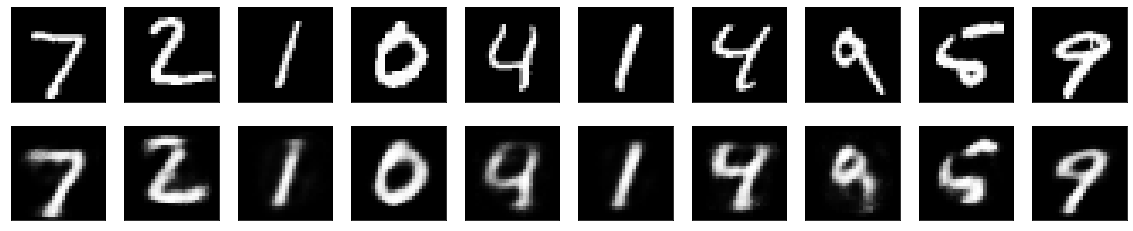

In [8]:
predictions = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Add sparsity to the simple autoencoder

In [9]:
input_layer = Input(shape=(784,))   # 28*28
encoded = layers.Dense(32, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_layer)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# reconstruction model:
autoencoder = keras.Model(input_layer, decoded)

# encoder model:
encoder = keras.Model(input_layer, encoded)

# decoder model:
encoded_input = keras.Input(shape=(32,))
decoder_layer = autoencoder.layers[-1]  # last layer of autoencoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [10]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=2048,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/30
24/24 [==============================] - 4s 105ms/step - loss: 0.6064 - val_loss: 0.4233
Epoch 2/30
24/24 [==============================] - 2s 88ms/step - loss: 0.3365 - val_loss: 0.2939
Epoch 3/30
24/24 [==============================] - 2s 75ms/step - loss: 0.2845 - val_loss: 0.2727
Epoch 4/30
24/24 [==============================] - 2s 91ms/step - loss: 0.2640 - val_loss: 0.2522
Epoch 5/30
24/24 [==============================] - 2s 79ms/step - loss: 0.2445 - val_loss: 0.2342
Epoch 6/30
24/24 [==============================] - 2s 85ms/step - loss: 0.2285 - val_loss: 0.2203
Epoch 7/30
24/24 [==============================] - 2s 77ms/step - loss: 0.2162 - val_loss: 0.2098
Epoch 8/30
24/24 [==============================] - 2s 88ms/step - loss: 0.2068 - val_loss: 0.2015
Epoch 9/30
24/24 [==============================] - 2s 79ms/step - loss: 0.1991 - val_loss: 0.1945
Epoch 10/30
24/24 [==============================] - 2s 101ms/step - loss: 0.1925 - val_loss: 0.1883
Epoch 1

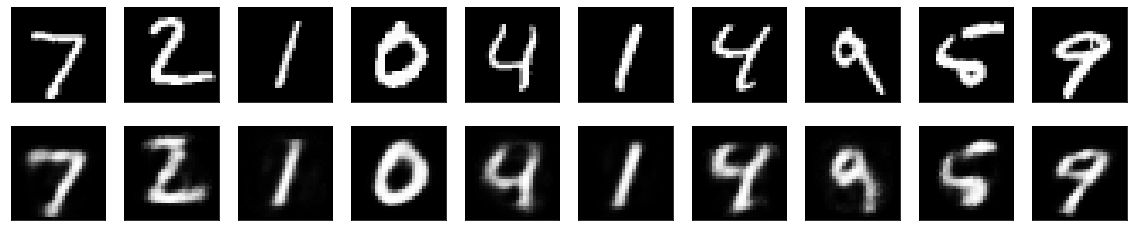

In [11]:
predictions = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Adding layers to autoencoder

In [12]:
input_layer = Input(shape=(784,))   # 28*28
encoded = layers.Dense(128, activation='relu')(input_layer)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

# reconstruction model:
autoencoder = keras.Model(input_layer, decoded)

# encoder model:
encoder = keras.Model(input_layer, encoded)

# decoder model:
encoded_input = keras.Input(shape=(32,))
decoder_layer = autoencoder.layers[-3]  # decoder layers of autoencoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [13]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=2048,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/30
24/24 [==============================] - 3s 102ms/step - loss: 0.5022 - val_loss: 0.2977
Epoch 2/30
24/24 [==============================] - 2s 95ms/step - loss: 0.2807 - val_loss: 0.2671
Epoch 3/30
24/24 [==============================] - 2s 97ms/step - loss: 0.2610 - val_loss: 0.2526
Epoch 4/30
24/24 [==============================] - 3s 107ms/step - loss: 0.2442 - val_loss: 0.2321
Epoch 5/30
24/24 [==============================] - 2s 96ms/step - loss: 0.2225 - val_loss: 0.2110
Epoch 6/30
24/24 [==============================] - 2s 97ms/step - loss: 0.2044 - val_loss: 0.1938
Epoch 7/30
24/24 [==============================] - 3s 112ms/step - loss: 0.1881 - val_loss: 0.1799
Epoch 8/30
24/24 [==============================] - 3s 108ms/step - loss: 0.1769 - val_loss: 0.1710
Epoch 9/30
24/24 [==============================] - 2s 99ms/step - loss: 0.1691 - val_loss: 0.1647
Epoch 10/30
24/24 [==============================] - 2s 97ms/step - loss: 0.1628 - val_loss: 0.1584
Epoch

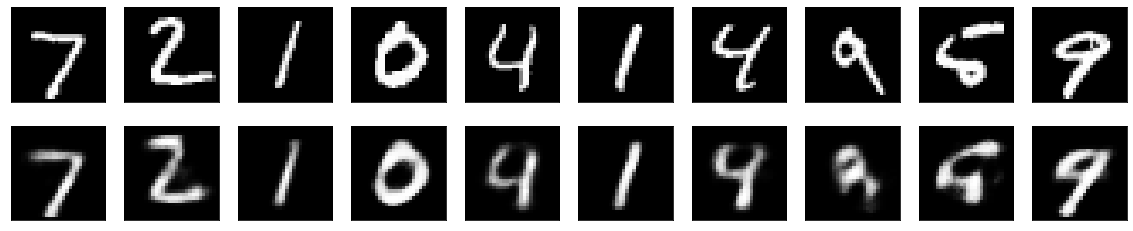

In [14]:
predictions = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Let's try a model with larger layers

This architecture came from here: https://www.kaggle.com/shivamb/how-autoencoders-work-intro-and-usecases

In [15]:
## input layer
input_layer = Input(shape=(784,))   # 28*28

## encoding architecture
encode_layer1 = Dense(1500, activation='relu')(input_layer)
encode_layer2 = Dense(1000, activation='relu')(encode_layer1)
encode_layer3 = Dense(500, activation='relu')(encode_layer2)

## latent view
latent_view   = Dense(10, activation='sigmoid')(encode_layer3)

## decoding architecture
decode_layer1 = Dense(500, activation='relu')(latent_view)
decode_layer2 = Dense(1000, activation='relu')(decode_layer1)
decode_layer3 = Dense(1500, activation='relu')(decode_layer2)

## output layer
output_layer  = Dense(784)(decode_layer3)

model = Model(input_layer, output_layer)

model.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_10 (Dense)             (None, 1500)              1177500   
_________________________________________________________________
dense_11 (Dense)             (None, 1000)              1501000   
_________________________________________________________________
dense_12 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                5010      
_________________________________________________________________
dense_14 (Dense)             (None, 500)               5500      
_________________________________________________________________
dense_15 (Dense)             (None, 1000)              5010

In [16]:
model.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
model.fit(x_train, x_train, epochs=30, batch_size=2048, validation_data=(x_validation, x_validation), callbacks=[early_stopping])

Epoch 1/30
24/24 [==============================] - 24s 953ms/step - loss: 0.0732 - val_loss: 0.0651
Epoch 2/30
24/24 [==============================] - 23s 957ms/step - loss: 0.0630 - val_loss: 0.0598
Epoch 3/30
24/24 [==============================] - 23s 970ms/step - loss: 0.0587 - val_loss: 0.0566
Epoch 4/30
24/24 [==============================] - 25s 1s/step - loss: 0.0528 - val_loss: 0.0498
Epoch 5/30
24/24 [==============================] - 27s 1s/step - loss: 0.0468 - val_loss: 0.0440
Epoch 6/30
24/24 [==============================] - 44s 2s/step - loss: 0.0410 - val_loss: 0.0382
Epoch 7/30
24/24 [==============================] - 46s 2s/step - loss: 0.0361 - val_loss: 0.0337
Epoch 8/30
24/24 [==============================] - 42s 2s/step - loss: 0.0324 - val_loss: 0.0312
Epoch 9/30
24/24 [==============================] - 38s 2s/step - loss: 0.0301 - val_loss: 0.0291
Epoch 10/30
24/24 [==============================] - 41s 2s/step - loss: 0.0281 - val_loss: 0.0273
Epoch 11/3

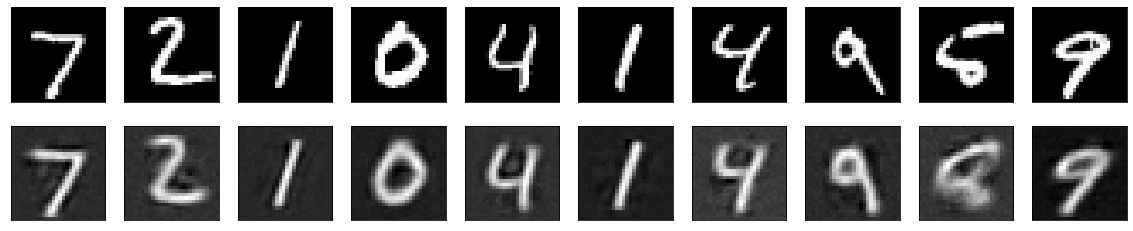

In [17]:
predictions = model.predict(x_test)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Hmmmm, what's going on? A more complicated model doesn't seem to be doing as well as a very simple autoencoder

## Let's try adding convolution

In [18]:
# shape back into image matrices
x_train = x_train.reshape(-1, 28, 28, 1)
x_validation = x_validation.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

x_train.shape, x_validation.shape, x_test.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (10000, 28, 28, 1))

In [19]:
input_layer = Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_layer)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [20]:
autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=2048,
                shuffle=True,
                validation_data=(x_validation, x_validation))

Epoch 1/30
24/24 [==============================] - 49s 2s/step - loss: 0.5998 - val_loss: 0.5028
Epoch 2/30
24/24 [==============================] - 42s 2s/step - loss: 0.4586 - val_loss: 0.4065
Epoch 3/30
24/24 [==============================] - 42s 2s/step - loss: 0.3345 - val_loss: 0.2672
Epoch 4/30
24/24 [==============================] - 43s 2s/step - loss: 0.2478 - val_loss: 0.2347
Epoch 5/30
24/24 [==============================] - 47s 2s/step - loss: 0.2285 - val_loss: 0.2226
Epoch 6/30
24/24 [==============================] - 53s 2s/step - loss: 0.2181 - val_loss: 0.2130
Epoch 7/30
24/24 [==============================] - 46s 2s/step - loss: 0.2077 - val_loss: 0.2014
Epoch 8/30
24/24 [==============================] - 42s 2s/step - loss: 0.1967 - val_loss: 0.1920
Epoch 9/30
24/24 [==============================] - 42s 2s/step - loss: 0.1885 - val_loss: 0.1854
Epoch 10/30
24/24 [==============================] - 42s 2s/step - loss: 0.1827 - val_loss: 0.1802
Epoch 11/30
24/24 [

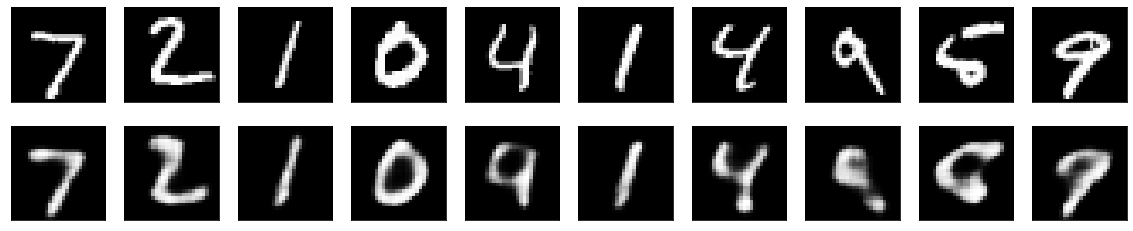

In [21]:
predictions = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Image denoising with autoencoders

In [22]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_validation_noisy = x_validation + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_validation.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_validation_noisy = np.clip(x_validation_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

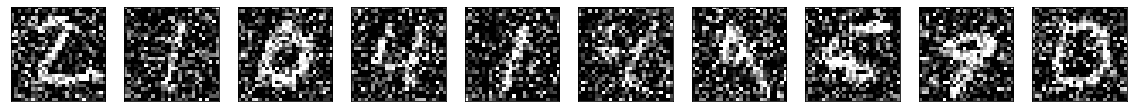

In [23]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [24]:
input_layer = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [25]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=30,
                batch_size=2048,
                shuffle=True,
                validation_data=(x_validation_noisy, x_validation))

Epoch 1/30
24/24 [==============================] - 131s 5s/step - loss: 0.5133 - val_loss: 0.4281
Epoch 2/30
24/24 [==============================] - 115s 5s/step - loss: 0.3296 - val_loss: 0.2338
Epoch 3/30
24/24 [==============================] - 104s 4s/step - loss: 0.2100 - val_loss: 0.1889
Epoch 4/30
24/24 [==============================] - 103s 4s/step - loss: 0.1768 - val_loss: 0.1667
Epoch 5/30
24/24 [==============================] - 95s 4s/step - loss: 0.1604 - val_loss: 0.1544
Epoch 6/30
24/24 [==============================] - 99s 4s/step - loss: 0.1500 - val_loss: 0.1455
Epoch 7/30
24/24 [==============================] - 80s 3s/step - loss: 0.1422 - val_loss: 0.1388
Epoch 8/30
24/24 [==============================] - 82s 3s/step - loss: 0.1370 - val_loss: 0.1352
Epoch 9/30
24/24 [==============================] - 81s 3s/step - loss: 0.1324 - val_loss: 0.1305
Epoch 10/30
24/24 [==============================] - 85s 4s/step - loss: 0.1291 - val_loss: 0.1282
Epoch 11/30
24/

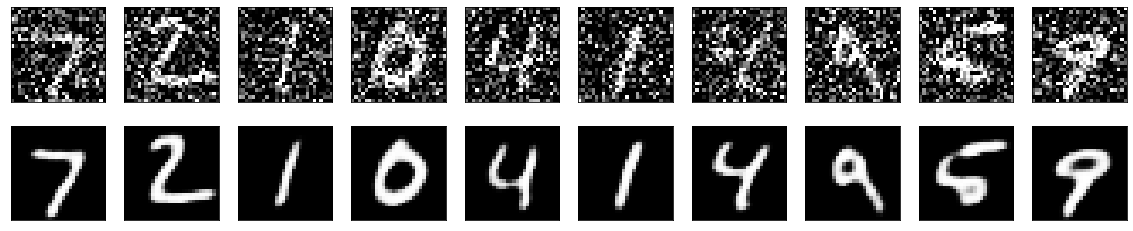

In [26]:
predictions = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # noisy
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Variational autoencoder

In [27]:
x_train_vae = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_validation_vae = x_validation.reshape((len(x_validation), np.prod(x_validation.shape[1:])))
x_test_vae = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [28]:
input_layer = Input(shape=(784,))

h = layers.Dense(64, activation='relu')(input_layer)
z_mean = layers.Dense(2)(h)
z_log_sigma = layers.Dense(2)(h)

def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], 2),
                              mean=0., stddev=0.1)
    return z_mean + backend.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])

In [29]:
# encoder part
encoder = keras.Model(input_layer, [z_mean, z_log_sigma, z], name='encoder')

# decoder part
latent_inputs = keras.Input(shape=(2,), name='z_sampling')
x = layers.Dense(64, activation='relu')(latent_inputs)
outputs = layers.Dense(784, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

# VAE model
outputs = decoder(encoder(input_layer)[2])
vae = keras.Model(input_layer, outputs, name='vae')

vae.compile(optimizer='adam', loss='binary_crossentropy')

In [30]:
vae.fit(x_train_vae, x_train_vae,
        epochs=30,
        batch_size=2048,
        validation_data=(x_validation_vae, x_validation_vae))

Epoch 1/30
24/24 [==============================] - 3s 81ms/step - loss: 0.5999 - val_loss: 0.4074
Epoch 2/30
24/24 [==============================] - 2s 88ms/step - loss: 0.3247 - val_loss: 0.2876
Epoch 3/30
24/24 [==============================] - 2s 73ms/step - loss: 0.2797 - val_loss: 0.2728
Epoch 4/30
24/24 [==============================] - 2s 79ms/step - loss: 0.2673 - val_loss: 0.2612
Epoch 5/30
24/24 [==============================] - 2s 76ms/step - loss: 0.2572 - val_loss: 0.2532
Epoch 6/30
24/24 [==============================] - 2s 83ms/step - loss: 0.2510 - val_loss: 0.2482
Epoch 7/30
24/24 [==============================] - 2s 77ms/step - loss: 0.2466 - val_loss: 0.2444
Epoch 8/30
24/24 [==============================] - 2s 76ms/step - loss: 0.2435 - val_loss: 0.2418
Epoch 9/30
24/24 [==============================] - 2s 79ms/step - loss: 0.2411 - val_loss: 0.2396
Epoch 10/30
24/24 [==============================] - 2s 93ms/step - loss: 0.2391 - val_loss: 0.2378
Epoch 11/

#### Let's see what our data looks like in the latent space

In [31]:
z_mean, _, _ = encoder.predict(x_test_vae)

<AxesSubplot:xlabel='x', ylabel='y'>

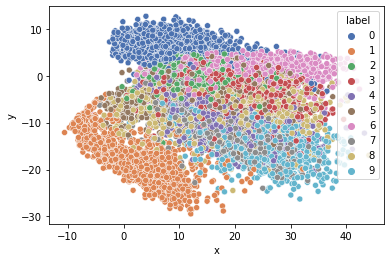

In [32]:
df = pd.DataFrame(list(zip(np.array(z_mean).transpose()[0], np.array(z_mean).transpose()[1], y_test)), 
                  columns =['x', 'y', 'label']) 

sns.scatterplot(data=df, x="x", y="y", hue="label",palette="deep",legend="full")

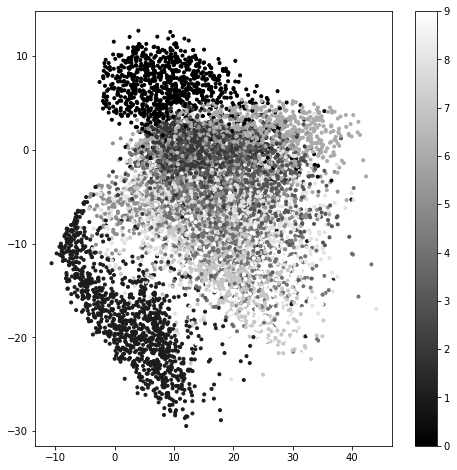

In [33]:
plt.figure(figsize=(8, 8))
plt.scatter(x=np.array(z_mean).transpose()[0], y=np.array(z_mean).transpose()[1], c=y_test, marker=".")
plt.colorbar()
plt.show()